# AUEB M.Sc. in Data Science (part-time)

**Course**: Machine Learning and Computational Statistics

**Semester**: Winter 2018

**2nd homework**

**Author**: Spiros Politis

---

In [1]:
# Some python libraries required for all excercises
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# Define a random seed for reproducability
np.random.seed = 19730618

# Aesthetics for plots
plot_main_title_font = {
    "family": "sans serif",
    "color":  "black",
    "weight": "bold",
    "size": 18,
}

plot_axis_title_font = {
    "family": "sans serif",
    "color":  "black",
    "weight": "bold",
    "size": 14,
}

---

## Exercise 1 (python code + text)

### Question (a)

**Generate** a set <font color="red">$X$</font> $= {(y_{i} , \boldsymbol{x}_i ), \boldsymbol{x}_i = [x_{i1} , x_{i2}]^{T} \in R^{2}, y_{i} \in R, i = 1, \dots ,200}$ from the model

$$y = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + \theta_{3}x_{1}x_{2} + \eta$$

where $η$ is an i.i.d. normal zero mean noise, with variance 0.05. Use $\theta_{0} = 3, \theta_{1} = 2, \theta_{2} = 1, \theta_{3} = 1$. In the sequel, pretend that you do not know the model that generates the data. All you have at your disposal is the data set <font color="red">$X$</font>.

#### Answer (a)

In [2]:
# Define constants
# Number of data points
N = 200

# Gaussian parameters
GAUSSIAN_MU = 0
GAUSSIAN_S2 = 0.05

# Initial theta parameter values
THETA_0 = 3
THETA_1 = 2
THETA_2 = 1
THETA_3 = 1

In [3]:
'''
    Implementation of the Gaussian noise function.
    
    :param mean: parameter μ of the distribution (default 0.0)
    :param variance: parameter σ^2 of the distribution (default 0.0)
    :param size: number of samples to return (deafult 1)
    
    :returns: (1, size) Numpy array of samples
'''
def gaussian(mean = 0.0, variance = 0.0, size = 1):    
    return np.random.normal(loc = mean, scale = math.sqrt(variance), size = size)

In [4]:
'''
    Vectorized implementation of the function y = θ0 + θ1x1 + θ2x2 + θ3x1x2 + η.
    
    :param x_1: vector of x1 input values
    :param x_2: vector of x2 input values
    
    :returns: (N, 1) Numpy array y
'''
def f(x_1, x_2):
    # Define the column vector of parameters θ
    theta = np.array([THETA_0, THETA_1, THETA_2, THETA_3]).reshape(4, 1)
    
    # Define the column vector of features x,
    # not forgetting to include the corresponding 1s for θ0
    x = np.stack([np.ones((N, 1), dtype = np.float64), x_1, x_2, x_1 * x_2], axis = 1).reshape(N, 4)
    
    # Apply the parameter vector θ
    x = theta.T * x
    
    # Get η
    eta = gaussian(mean = GAUSSIAN_MU, variance = GAUSSIAN_S2, size = (N, 1))
        
    return x.sum(axis = 1).reshape(N, 1) + eta


'''
    A wrapper function to get X. Concatenates f(x_1, x_2), x_1, x_2 so as to get the final X.
    
    :param x_1: vector of x1 input values
    :param x_2: vector of x2 input values
    
    :returns: (N, 3) Numpy matrix (X)
'''
def X(x_1, x_2):
    return np.concatenate((f(x_1, x_2), x_1, x_2), axis = 1)

# A couple of ways to generate random data points...

# Define the feature vector x_1
#x_1 = gaussian(mean = GAUSSIAN_MU, variance = GAUSSIAN_S2, size = (N, 1))
x_1 = np.random.randn(N, 1)

# Define the feature vector x_2
#x_2 = gaussian(mean = GAUSSIAN_MU, variance = GAUSSIAN_S2, size = (N, 1))
x_2 = np.random.randn(N, 1)

# Get X
X = X(x_1, x_2)

# Show 5 elements for quick inspection
print("X first 5 rows")
print("-------------------------------------------")
print(X[0:5,:])
print("\n")
print("X shape")
print("-------------------------------------------")
print(X.shape)

X first 5 rows
-------------------------------------------
[[ 3.50045195  0.58954298 -0.49662062]
 [-1.40446635 -2.03673995  0.64319845]
 [ 0.54209779 -1.38702433 -0.28401506]
 [ 2.37084818 -0.30550329 -0.49909417]
 [ 1.46840007 -0.85664616 -0.0780796 ]]


X shape
-------------------------------------------
(200, 3)


Let's visualize $X$:

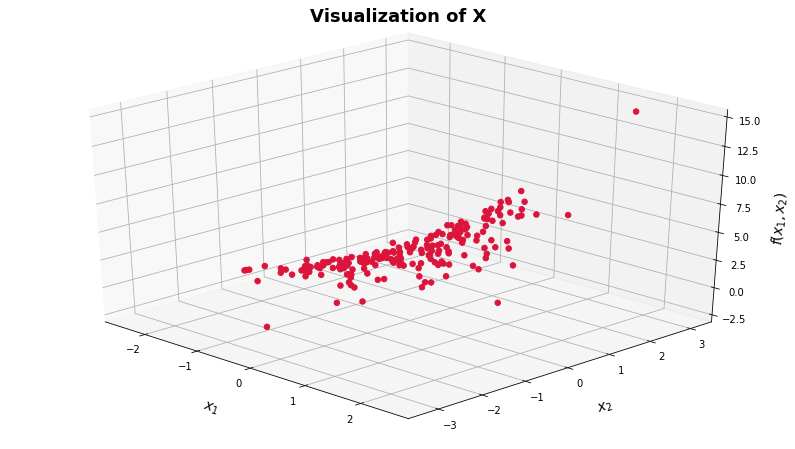

In [5]:
# A simple plot to get a feel of our data set
fig, ax = plt.subplots(figsize = (14, 8), sharey = True)
ax = plt.axes(projection = "3d")
ax.view_init(elev = 30, azim = -45)

ax.scatter3D(X[:, 1], X[:, 2], X[:, 0], s = 30, alpha = 1, marker = "o", color = "crimson");

ax.set_title("Visualization of X", fontdict = plot_main_title_font, pad = 20)
ax.set_xlabel(r"$x_{1}$", fontdict = plot_axis_title_font, labelpad = 20)
ax.set_ylabel(r"$x_{2}$", fontdict = plot_axis_title_font, labelpad = 20)
ax.set_zlabel(r"$f(x_{1}, x_{2})$", fontdict = plot_axis_title_font, labelpad = 10)

pass;

### Question (b)

**Apply** the transformation 
$\phi(x) = \begin{bmatrix} \phi_{1}(\boldsymbol{x}) \\ \phi_{2}(\boldsymbol{x}) \\ \phi_{3}(\boldsymbol{x}) \end{bmatrix} = $
$\begin{bmatrix} x_{1} \\ x_{2} \\ x_{1} \cdot x_{2} \end{bmatrix}$,
on all 
$x_{i}$’s of <font color="red">$X$</font>. 
Denoting $\boldsymbol{x}_{i}' \in R^{3}$ the image of $\boldsymbol{x}_{i}$, form a new data set <font color="red">$X'$</font> $ = \{ (y_{i}, \boldsymbol{x}_{i}'), \boldsymbol{x}_{i}' \in R^{3}, y_{i} \in R, i = 1, \dots, 200 \}$.

#### Answer (b)

In [6]:
'''
    Vectorized implementation of computing φ(x).
    
    :param X: (N, 3) Numpy matrix (X)
    
    :returns: (N, 4) Numpy matrix (X')
'''
def phi(X):
    # Create X' as an empty array with the dimensions of X
    X_dash = np.empty(shape = [N, 4])
    
    X_dash[:, 0] = X[:, 0]
    X_dash[:, 1] = X[:, 1]
    X_dash[:, 2] = X[:, 2]
    X_dash[:, 3] = X[:, 1] * X[:, 2]
    
    return X_dash

X_dash = phi(X)

# Show 5 elements for quick inspection
print("X' first 5 rows")
print("-------------------------------------------")
print(X_dash[0:5,:])
print("\n")
print("X' shape")
print("-------------------------------------------")
print(X_dash.shape)

X' first 5 rows
-------------------------------------------
[[ 3.50045195  0.58954298 -0.49662062 -0.2927792 ]
 [-1.40446635 -2.03673995  0.64319845 -1.31002797]
 [ 0.54209779 -1.38702433 -0.28401506  0.39393579]
 [ 2.37084818 -0.30550329 -0.49909417  0.15247491]
 [ 1.46840007 -0.85664616 -0.0780796   0.06688659]]


X' shape
-------------------------------------------
(200, 4)


### Question (c)

**Adopting** the linear model assumption in the transformed space and the OLS criterion, estimate the parameters of the model.

#### Answer (c)

Applying the transformation will have $y$ be linearly dependent on $\phi(x)$. So, the linear function becomes:

$$y = \theta_{0} + \theta_{1}\phi_{1}(x) + \theta_{2}\phi_{2}(x) + \theta_{3}\phi_{2}(x) \implies y = \theta_{0} + \boldsymbol{\theta}^{T}\boldsymbol{\phi(x)}$$

Stacking the data vectors as rows in the matrix X leads to the alternative representation

$$X^{T}X\hat{\theta} = X^{T}\boldsymbol{y}$$

which, provided that $X^{T}X$ is **invertible**, gives the least squares estimator of $\theta$

$$\hat{\boldsymbol{\theta}}_{OLS} = (X^{T}X)^{-1}X^{T}\boldsymbol{y}$$

The estimated parameter vector $\hat{\boldsymbol{\theta}}_{OLS}$ is of dimensionality **4** and is estimated below:

In [7]:
'''
    Vectorized implementation of computing the estimated θ vector (theta hat).
    
    :param X_dash: (N, 4) Numpy matrix (X')
    
    :returns: (4, 1) Numpy column vector (theta hat)
'''
def theta_hat_ols(X_dash):
    # Get X and append 1s
    X = np.concatenate([np.ones((X_dash.shape[0], 1)), X_dash[:, [1, 2, 3]]], axis = 1)

    # Get y
    y = X_dash[:, [0]]

    # Calculate X.T * X
    XTX = np.dot(X.T, X)

    # Calculate the inverse of X.T * X
    XTX_inv = np.linalg.inv(XTX)

    # Calculate theta estimate
    theta_hat_ols = XTX_inv.dot(X.T).dot(y)
    
    return theta_hat_ols

theta_hat_ols = theta_hat_ols(X_dash)

# Output the parameter vector Θ and its dimensionality
print("Model parameters (theta hat)")
print("-------------------------------------------")
print("θ0:", theta_hat_ols[0][0])
print("θ1:", theta_hat_ols[1][0])
print("θ2:", theta_hat_ols[2][0])
print("θ3:", theta_hat_ols[3][0])
print("\n")
print("Dimensionality of model parameters (theta hat)")
print("-------------------------------------------")
print(theta_hat_ols.shape[0])

Model parameters (theta hat)
-------------------------------------------
θ0: 3.016084846901119
θ1: 1.9956311071971875
θ2: 1.0219032697554888
θ3: 0.9976901025824956


Dimensionality of model parameters (theta hat)
-------------------------------------------
4


---

## Exercise 2 (python code + text)

### Question (a)

**Generate** a set <font color="red">$X$</font> $ = \{(y_{i}, \boldsymbol{x}_{i}), \boldsymbol{x}_i \in R^{2}, y_{i} \in \{-1, +1\}, i = 1, \dots, 2000\}$, as follows: Select 2000 points in the squared area $[-2,2]x[-2,2]$ of the $R^{2}$ space, using the uniform distribution. All points that lie on the positive side of the curve <font color="red">$x_{2}^{2} − x_{1}^{2} = 0$</font>, are assigned to the class "+1", while all the others are assigned to class "-1". Plot the data using different colors for points from different classes. In the sequel, pretend that you do not know how the data were generated. All you have at your disposal is the data set <font color="red">$X$</font>.

#### Answer (a)

In [8]:
# Define constants
# Number of data points
N = 2000

# Define the uniform distribution parameters
UNIF_LOW = -2
UNIF_HIGH = 2

In [9]:
'''
    Defines the uniform samples generator function
    
    :param low: low boundary of the PMF of the uniform distribution (default 1.0)
    :param high: high boundary of the PMF of the uniform distribution (default 1.0)
    :param size: number of samples (default 1)
    
    :returns: (1, size) Numpy array of samples
'''
def uniform(low = 1.0, high = 1.0, size = 1):
    return np.random.uniform(low = low, high = high, size = size)

In [10]:
'''
    Vectorized implementation of of x2^2 - x1^2 = 0
    
    :param low: low boundary of the PMF of the uniform distribution (default 1.0)
    :param high: high boundary of the PMF of the uniform distribution (default 1.0)
    :param size: number of samples (default 1)
    
    :returns: (N, 1) Numpy matrix of classes
'''
def f(x_1, x_2):
    f_x = np.power(x_2, 2) - np.power(x_1, 2)
    f_x[f_x >= 0] = 1
    f_x[f_x < 0] = -1
    
    return f_x.reshape(N, 1)


'''
    A wrapper function to get X
    
    :param x_1: vector of x1 input values
    :param x_2: vector of x2 input values
    
    :returns: (N, 3) Numpy matrix (X)
'''
def X(x_1, x_2):
    return np.concatenate((f(x_1, x_2), x_1, x_2), axis = 1)

# Define x_1
x_1 = uniform(low = UNIF_LOW, high = UNIF_HIGH, size = N).reshape(N, 1)

# Define x_2
x_2 = uniform(low = UNIF_LOW, high = UNIF_HIGH, size = N).reshape(N, 1)

# Get X
X = X(x_1, x_2)

Plot of $X$:

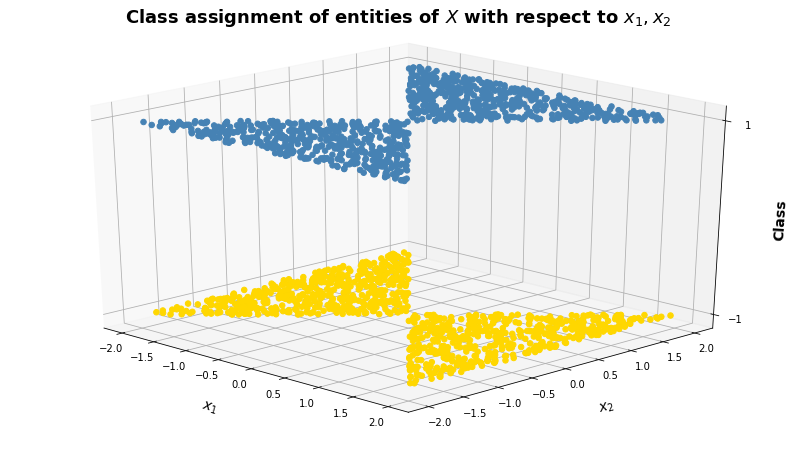

In [11]:
# Plot the data set
# Class 1
X_p = X[X[:, 0] > 0]
# Class -1
X_n = X[X[:, 0] < 0]

fig, ax = plt.subplots(figsize = (14, 8), sharey = True)
ax = plt.axes(projection = "3d")
ax.view_init(elev = 25, azim = -45)

# Plot data points
ax.scatter3D(X_p[:, 1], X_p[:, 2], X_p[:, 0], s = 30, alpha = 1, marker = "o", color = "steelblue")
ax.scatter3D(X_n[:, 1], X_n[:, 2], X_n[:, 0], s = 30, alpha = 1, marker = "o", color = "gold")

ax.set_title("Class assignment of entities of " + r"$X$" + " with respect to " + r"$x_{1}, x_{2}$", fontdict = plot_main_title_font, pad = 20)
ax.set_xlabel(r"$x_{1}$", fontdict = plot_axis_title_font, labelpad = 20)
ax.set_ylabel(r"$x_{2}$", fontdict = plot_axis_title_font, labelpad = 20)
ax.set_zlabel("Class", fontdict = plot_axis_title_font, labelpad = 10)
ax.set_zticks([-1, 1])

pass;

### Question (b)

**Apply** the transformation 

$\phi(x) = \begin{bmatrix} \phi_{1}(\boldsymbol{x}) \\ \phi_{2}(\boldsymbol{x}) \end{bmatrix} =$
$\begin{bmatrix} x_{1}^{2} \\ x_{2}^{2} \end{bmatrix}$

on all $\boldsymbol{x}_i$'s of <font color="red">$X$</font>. Denoting by $\boldsymbol{x}_i'$ the image of $\boldsymbol{x}_i$, we form a new data set <font color="red">$X'$</font> $ = \{y_{i}, \boldsymbol{x}_{i}', i = 1, \dots, 2000 \}$.

#### Answer (b)

In [12]:
'''
    Vectorized implementation of φ(x)
    
    :param X: (N, 3) Numpy matrix (X)
    
    :returns: (N, 3)  Numpy matrix (X')
'''
def phi(X):
    # Create X' as an empty array with the dimensions of X
    X_dash = np.empty_like(X)
    
    X_dash[:, 0] = X[:, 0]
    X_dash[:, 1] = np.power(X[:, 1], 2)
    X_dash[:, 2] = np.power(X[:, 2], 2)
    
    return X_dash

X_dash = phi(X)

# Output 5 elements for inspection
print("X' first 5 rows")
print("-------------------------------------------")
print(X_dash[0:5,:])
print("\n")
print("X' shape")
print("-------------------------------------------")
print(X_dash.shape)

X' first 5 rows
-------------------------------------------
[[ 1.          0.01575438  0.03342482]
 [ 1.          0.07592127  1.51024048]
 [-1.          1.39146456  0.55444424]
 [-1.          1.67855923  0.33343409]
 [-1.          1.82191696  0.80737359]]


X' shape
-------------------------------------------
(2000, 3)


### Question (c)

**Plot** the $\boldsymbol{x}_{i}'$’s using again different colors for points from different classes and compare the resulting plot with that of (a). Comment on them.

#### Answer (c)

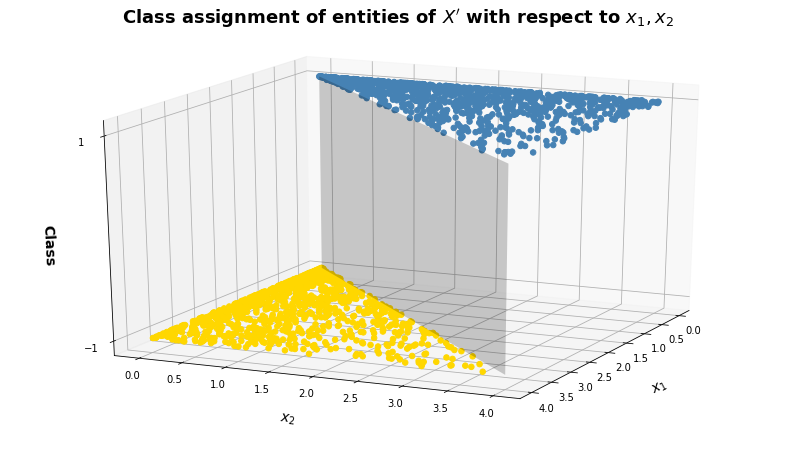

In [13]:
# Plot the data set
# Class 1
X_p = X_dash[X_dash[:, 0] > 0]
# Class -1
X_n = X_dash[X_dash[:, 0] < 0]

fig, ax = plt.subplots(figsize = (14, 8), sharey = True)
ax = plt.axes(projection = "3d")
ax.view_init(20, 25)

# Plot data points
ax.scatter3D(X_p[:, 1], X_p[:, 2], X_p[:, 0], s = 30, alpha = 1, marker = "o", color = "steelblue")
ax.scatter3D(X_n[:, 1], X_n[:, 2], X_n[:, 0], s = 30, alpha = 1, marker = "o", color = "gold")

# Plot the hyperplane separating classes
ax.plot_surface(np.array([0, 4]), np.array([0, 4]), np.array([[-1, -1], [1, 1]]), alpha = 0.2, color = "black")

ax.set_title("Class assignment of entities of " + r"$X'$" + " with respect to " + r"$x_{1}, x_{2}$", fontdict = plot_main_title_font, pad = 20)
ax.set_xlabel(r"$x_{1}$", fontdict = plot_axis_title_font, labelpad = 20)
ax.set_ylabel(r"$x_{2}$", fontdict = plot_axis_title_font, labelpad = 20)
ax.set_zlabel("Class", fontdict = plot_axis_title_font, labelpad = 10)
ax.set_zticks([-1, 1])

pass;

We observe that the transformation has made classes $-1$, $+1$ **linearly seperable** by the hyperplane shown in the plot, defined by points  $\{(-1, (0, 0)), (-1, (4, 4)), (1, (0, 0)), (1, (4, 4)) \}$.

### Question (d)

**Adopting** the linear model assumption in the transformed space and the OLS criterion, estimate the parameters of the model.

#### Answer (d)

Having adopted the linear model assumption and the respective transformation, we are left with a model of the form 

$$\phi(x_{1}) + \phi(x_{2}) \gt (\lt) 0 \rightarrow \boldsymbol{x} \in -1(1)$$

linear wrt $\boldsymbol{\theta}$.

Stacking the the matrix $X'$ 's data vectors as rows leads to the alternative representation

$$X^{T}X\hat{\theta} = X^{T}\boldsymbol{y}$$

which, provided that $X^{T}X$ is **invertible**, gives the least squares estimator of $\theta$

$$\hat{\boldsymbol{\theta}}_{OLS} = (X^{T}X)^{-1}X^{T}\boldsymbol{y}$$

The estimated parameter vector $\hat{\boldsymbol{\theta}}_{OLS}$ is of dimensionality **3** and is estimated below:

In [14]:
'''
    Vectorized implementation of computing the estimated θ vector (theta hat).
    
    :param X_dash: (N, 3) Numpy matrix (X')
    
    :returns: (3, 1) Numpy column vector (theta hat)
'''
def theta_hat_ols(X_dash):
    # Get X and append 1s
    X = np.concatenate([np.ones((X_dash.shape[0], 1)), X_dash[:, [1, 2]]], axis = 1)
    
    # Get y
    y = X_dash[:, [0]]

    # Calculate X.T * X
    XTX = np.dot(X.T, X)

    # Calculate the inverse of X.T * X
    XTX_inv = np.linalg.inv(XTX)

    # Calculate theta estimate
    theta_hat_ols = XTX_inv.dot(X.T).dot(y)
    
    return theta_hat_ols

theta_hat_ols = theta_hat_ols(X_dash)

# Output the parameter vector Θ and its dimensionality
print("Model parameters (theta hat)")
print("-------------------------------------------")
print("θ0:", theta_hat_ols[0][0])
print("θ1:", theta_hat_ols[1][0])
print("θ2:", theta_hat_ols[2][0])
print("\n")
print("Dimensionality of model parameters (theta hat)")
print("-------------------------------------------")
print(theta_hat_ols.shape[0])

Model parameters (theta hat)
-------------------------------------------
θ0: 0.014448858813868756
θ1: -0.4673973881148578
θ2: 0.4638177303518327


Dimensionality of model parameters (theta hat)
-------------------------------------------
3


---

## Exercise 3

Consider the following nonlinear model:


$$y = 3x_{1}^{2} + 4x_{2}^{2} + 5x_{3}^{2} + 7x_{1}x_{2} + x_{1}x_{3} + 4x_{2}x_{3} − 2x_{1} − 3x_{2} − 5x_{3} + \eta$$


Define a suitable function $\phi$ that transforms the problem to a space where the problem of estimating the model becomes linear. What is the dimension of the original and the transformed space?

### Answer 3

We need to define a transformation function $\phi$ as

$$\phi(x) = \begin{bmatrix} \phi_{1}(x) & \phi_{2}(x) & \phi_{3}(x) & \phi_{4}(x) & \phi_{5}(x) & \phi_{6}(x) & \phi_{7}(x) & \phi_{8}(x) & \phi_{9}(x) \end{bmatrix}^{T} = \begin{bmatrix} x_{1}^{2} & x_{2}^{2} & x_{3}^{2} & x_{1}x_{2} & x_{1}x_{3} & x_{2}x_{3} & x_{1} & x_{2} & x_{3} \end{bmatrix}^{T}$$

therefore obtaining the linear model wrt $\theta$

$$y = \theta_{0} + \theta_{1}\phi_{1}(x) + \theta_{2}\phi_{2}(x) + \theta_{3}\phi_{3}(x) + \theta_{4}\phi_{4}(x) + \theta_{5}\phi_{5}(x) + \theta_{6}\phi_{6}(x) + \theta_{7}\phi_{7}(x) + \theta_{8}\phi_{8}(x) + \theta_{9}\phi_{9}(x) + \eta$$

The space is transformed from $R^{3} \rightarrow R^{9}$.

---

## Exercise 4

Consider the following two-class nonlinear classification task:

$$\boldsymbol{x} = \begin{bmatrix} x_{1}, x_{2}, x_{3} \end{bmatrix}^{T}:$$
$$x_{1}^{2} + 3x_{2}^{2} + 6x_{3}^{2} + x_{1}x_{2} + x_{2}x_{3} \gt (\lt)3 \rightarrow \boldsymbol{x} \in \omega_{1} (\omega_{2})$$

Define a suitable function $\phi$ that transforms the problem to a space where the problem of estimating the border of the two classes becomes linear. What is the dimension of the original and the transformed space?

### Answer

We need to define a transformation function $\phi$ as

$$\phi(x) = \begin{bmatrix} \phi_{1}(x) & \phi_{2}(x) & \phi_{3}(x) & \phi_{4}(x) & \phi_{5}(x) \end{bmatrix}^{T} = \begin{bmatrix} x_{1}^{2} & x_{2}^{2} & x_{3}^{2} & x_{1}x_{2} & x_{2}x_{3} \end{bmatrix}^{T}$$

therefore obtaining the linear model

$$\phi(x_{1}) + \phi(x_{2}) + \phi(x_{3}) + \phi(x_{4}) + \phi(x_{5}) \gt (\lt) 3 \rightarrow \boldsymbol{x} \in +3(-3)$$

The space is transformed from $R^{3} \rightarrow R^{5}$.

---

## Exercise 5

Consider the following data points 
$x_{1} = \begin{bmatrix} 1, 1 \end{bmatrix}^{T}$, 
$x_{2} = \begin{bmatrix} 1, −1 \end{bmatrix}^{T}$,
$x_{3} = \begin{bmatrix} 0, 0.5 \end{bmatrix}^{T}$,
$x_{4} = \begin{bmatrix} −1, 1 \end{bmatrix}^{T}$,
$x_{5} = \begin{bmatrix} −1, −1 \end{bmatrix}^{T}$, 
where the first three belong to class +1, while the remaining two belong to class −1. Determine the linear classifier that is optimal with respect to the sum of squared errors criterion.

### Answer

Let $X = \{(1, \boldsymbol{x}_{i}), \boldsymbol{x}_i \in R^{2}, i = 1, \dots, 5\}$ be the matrix of features, including 1s for accomodating $\theta_{0}$ and $y = \{\boldsymbol{y}_i\}, y_{i} \in \{-1, +1\}$ so as to define the linear model $y = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + \eta$ in vector form.

Then, $\boldsymbol{X}$ and $\boldsymbol{y}$ are concretely:

$\boldsymbol{X} = \begin{bmatrix} 1 & 1 & 1 \\ 1 & 1 & -1 \\ 1 & 0 & 0.5 \\ 1 & -1 & 1 \\ 1 & -1 & -1 \end{bmatrix}$, $\boldsymbol{y} = \begin{bmatrix} 1 \\ 1 \\ 1 \\ -1 \\ -1 \end{bmatrix}$

Estimating the parameters $\theta$ of the model requires computing $\hat{\boldsymbol{\theta}}$, in vector form given by $\hat{\boldsymbol{\theta}} = (X^{T}X)^{-1}X^{T}\boldsymbol{y}$.

Therefore:

**Step 1** - Compute $X^{T}X$:

$X^{T}X = \begin{bmatrix} 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 0 & -1 & -1 \\ 1 & -1 & 0.5 & 1 & -1 \end{bmatrix} \cdot \begin{bmatrix} 1 & 1 & 1 \\ 1 & 1 & -1 \\ 1 & 0 & 0.5 \\ 1 & -1 & 1 \\ 1 & -1 & -1 \end{bmatrix} =$
$\begin{bmatrix} 1\cdot1 + 1\cdot1 + 1\cdot1 + 1\cdot1 + 1\cdot1 & 1\cdot1 + 1\cdot1 + 1\cdot0 + 1\cdot(-1) + 1\cdot(-1) & 1\cdot1 + 1\cdot(-1) + 1\cdot0.5 + 1\cdot1 + 1\cdot(-1) \\ 1\cdot1 + 1\cdot1 + 0\cdot1 + (-1)\cdot1 + (-1)\cdot1 & 1\cdot1 + 1\cdot1 + 0\cdot0 + (-1)\cdot(-1) + (-1)\cdot(-1) & 1\cdot1 + 1\cdot(-1) + 0\cdot0.5 + (-1)\cdot1 + (-1)\cdot(-1) \\ 1\cdot1 + (-1)\cdot1 + 0.5\cdot1 + 1\cdot1 + (-1)\cdot1 & 1\cdot1 + (-1)\cdot1 + 0.5\cdot0 + 1\cdot(-1) + (-1)\cdot(-1) & 1\cdot1 + (-1)\cdot(-1) + 0.5\cdot0.5 + 1\cdot1 + (-1)\cdot(-1) \end{bmatrix} = $
$\begin{bmatrix} 5 & 0 & 0.5 \\ 0 & 4 & 0 \\ 0.5 & 0 & 4.25 \end{bmatrix}$

</br>

**Step 2** - Compute $(X^{T}X)^{-1}$:

**Step 2.1** - Compute the determinant of $(X^{T}X)^{-1}$:

$|X^{T}X| = 5 \cdot \begin{bmatrix} 4 & 0 \\ 0 & 4.25 \end{bmatrix} - 0 \cdot \begin{bmatrix} 0 & 0 \\ 0.5 & 4.25 \end{bmatrix} + 0.5 \cdot \begin{bmatrix} 0 & 4 \\ 0.5 & 0 \end{bmatrix} = $
$5 \cdot (4 \cdot 4.25 - 0) - 0 + 0.5 \cdot (0 - 4 \cdot 0.5) = 84$

The determinant is positive, therefore $(X^{T}X)^{-1}$ exists. Let's compute it:

<br/>

**Step 2.2** - Compute $(X^{T}X)^{-1}$:

$(X^{T}X)^{-1} = \begin{bmatrix} 5 & 0 & 0.5 \\ 0 & 4 & 0 \\ 2.5 & -2 & 2.25 \end{bmatrix}^{-1} = $
$\begin{bmatrix}
\begin{vmatrix} 4 & 0 \\ -2 & 2.25 \end{vmatrix} & -\begin{vmatrix} 0 & 0 \\ 2.5 & 2.25 \end{vmatrix}  & \begin{vmatrix} 0 & 4 \\ 2.5 & -2 \end{vmatrix} \\ 
-\begin{vmatrix} 0 & 0.5 \\ -2 & 2.25 \end{vmatrix} & \begin{vmatrix} 5 & 0.5 \\ 2.5 & 2.25 \end{vmatrix} & -\begin{vmatrix} 5 & 0 \\ 2.5 & -2 \end{vmatrix} \\ 
\begin{vmatrix} 0 & 0.5 \\ 4 & 0 \end{vmatrix} & -\begin{vmatrix} 5 & 0.5 \\ 0 & 0 \end{vmatrix}  & \begin{vmatrix} 5 & 0 \\ 0 & 4 \end{vmatrix}
\end{bmatrix} =$
$\begin{bmatrix} 11 & 0 & 10 \\ 1 & 10 & 10 \\ -2 & 0 & 20 \end{bmatrix}$

Reflecting along the diagonal, we have:

$\begin{bmatrix} 11 & 1 & -2 \\ 0 & 10 & 0 \\ 10 & 10 & 20 \end{bmatrix}$

Multiplying with the inverese of the determinant, we finally get $(X^{T}X)^{-1}$:

$(X^{T}X)^{-1} = \frac{1}{|X^{T}X|} \cdot \begin{bmatrix} 11 & 1 & -2 \\ 0 & 10 & 0 \\ 10 & 10 & 20 \end{bmatrix} =$
$\frac{1}{84} \cdot \begin{bmatrix} 11 & 1 & -2 \\ 0 & 10 & 0 \\ 10 & 10 & 20 \end{bmatrix} = $
$\begin{bmatrix} 0.131 & 0.012 & -0.024 \\ 0 & 0.12 & 0 \\ 0.12 & 0.12 & 0.238 \end{bmatrix}$

<br/>

**Step 3** - Compute $\hat{\boldsymbol{\theta}}$:

$\hat{\boldsymbol{\theta}} = \begin{bmatrix} 0.131 & 0.012 & -0.024 \\ 0 & 0.12 & 0 \\ 0.12 & 0.12 & 0.238 \end{bmatrix} \cdot \begin{bmatrix} 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 0 & -1 & -1 \\ 1 & -1 & 0.5 & 1 & -1 \end{bmatrix} \cdot \begin{bmatrix} 1 \\ 1 \\ 1 \\ -1 \\ -1 \end{bmatrix} =$
$\begin{bmatrix} 0.19 \\ 1 \\ 0.95 \end{bmatrix}$

### Optional

Let's verify with some Python code:

In [15]:
# Define the 5x3 feature matrix [{1, x11, x21}, {1, x12, x22}, ...,{1, x1n, x2n}], n = 1...5
X = np.array([[1, 1, 1], [1, 1, -1], [1, 0, 0.5], [1, -1, 1], [1, -1, -1]])

# Define the column vector y
y = np.array([[1], [1], [1], [-1], [-1]])

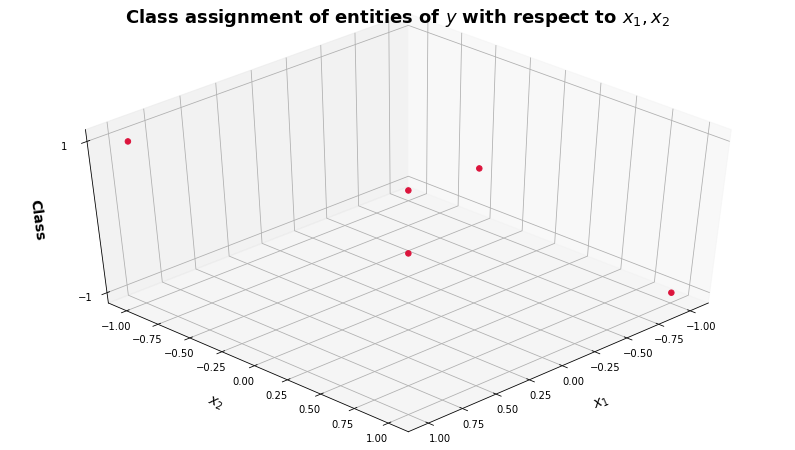

In [16]:
# Plot the data set
fig, ax = plt.subplots(figsize = (14, 8), sharey = True)
ax = plt.axes(projection = "3d")
ax.view_init(45, 45)

# Plot data points
ax.scatter3D(X[:, 1], X[:, 2], y[:, 0], s = 30, alpha = 1, marker = "o", color = "crimson")

ax.set_title("Class assignment of entities of " + r"$y$" + " with respect to " + r"$x_{1}, x_{2}$", fontdict = plot_main_title_font, pad = 20)
ax.set_xlabel(r"$x_{1}$", fontdict = plot_axis_title_font, labelpad = 20)
ax.set_ylabel(r"$x_{2}$", fontdict = plot_axis_title_font, labelpad = 20)
ax.set_zlabel("Class", fontdict = plot_axis_title_font, labelpad = 10)
ax.set_zticks([-1, 1])

pass;

In [17]:
# Calculate X.T * X
XTX = np.dot(X.T, X)

# Calculate the inverse of X.T * X
XTX_inv = np.linalg.inv(XTX)

# Calculate theta estimate
theta_hat = XTX_inv.dot(X.T).dot(y)

# Show the parameter vector Θ and its dimensionality
print("Model parameters (theta hat)")
print("-------------------------------------------")
print("θ0:", theta_hat[0][0])
print("θ1:", theta_hat[1][0])
print("θ2:", theta_hat[2][0])
print("\n")
print("Dimensionality of model parameters (theta hat)")
print("-------------------------------------------")
print(theta_hat.shape[0])

Model parameters (theta hat)
-------------------------------------------
θ0: 0.1904761904761905
θ1: 1.0
θ2: 0.09523809523809523


Dimensionality of model parameters (theta hat)
-------------------------------------------
3


---

## Excercise 6

Verify the sum, the product and the Bayes rule for the discrete-valued case, using the relative frequency definition of the probability.

### Answer

**Relative frequency definition of probability**

$P(A) = \lim_{n \to \infty} \frac{n_{A}}{n}$

$P(B) = \lim_{n \to \infty} \frac{n_{B}}{n}$

where $n_{A}, n_{B} = \text{number of succeses for events A and B respectively}, n = \text{number of trials}$.

**Sum rule (joint probability)**

**Product rule (conditional probability)**

The conditional probability of an event $A$ given another event $B$ is denoted as $P(A|B)$ and it is defined as

$$P(A|B) = \frac{P(A, B)}{P(B)}$$

Using the relative frequency definition of probability, we get

$$P(A|B) = \frac{P(A, B)}{P(B)} \implies P(A|B) = \frac{n_{AB}}{n} \frac{n}{n_{B}} \implies P(A|B) = \frac{n_{AB}}{n_{B}}$$

which shows that the conditional probability of an event, A, given an event B, is the relative frequency that A occurred, not with respect to the total number of experiments performed, but relative to the times event B occurred.

**Bayes rule**

$P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)} \implies \frac{n_{AB}}{n_{B}} = \frac{n_{BA}}{n_{A}} \cdot \frac{\frac{n_{A}}{n}}{\frac{n_{B}}{n}} \implies \frac{n_{AB}}{n_{B}} = \frac{n_{BA}}{n_{A}} \cdot \frac{n_{A}}{n_{B}} \implies \frac{n_{AB}}{n_{B}} = \frac{n_{BA}}{n_{B}} \implies n_{AB} = n_{BA}$

which shows that the relative frequencies of A and B are equal.